In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('DS3_C6_S3_Clustering_AbsenteeismAtWork_Data_Project.csv',delimiter=';')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


## Data Characteristics

In [3]:
df.shape

(740, 21)

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


## Classification of columns

In [15]:
#Transform data types
df['ID'] = df['ID'].astype('category')
df['Reason for absence'] = df['Reason for absence'].astype('category')
df['Month of absence'] = df['Month of absence'].astype('category')
df['Day of the week'] = df['Day of the week'].astype('category')
df['Seasons'] = df['Seasons'].astype('category')
df['Disciplinary failure'] = df['Disciplinary failure'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Son'] = df['Son'].astype('category')
df['Social drinker'] = df['Social drinker'].astype('category')
df['Social smoker'] = df['Social smoker'].astype('category')
df['Pet'] = df['Pet'].astype('category')

In [16]:
df.dtypes

ID                                 category
Reason for absence                 category
Month of absence                   category
Day of the week                    category
Seasons                            category
Transportation expense                int64
Distance from Residence to Work       int64
Service time                          int64
Age                                   int64
Work load Average/day               float64
Hit target                            int64
Disciplinary failure               category
Education                          category
Son                                category
Social drinker                     category
Social smoker                      category
Pet                                category
Weight                                int64
Height                                int64
Body mass index                       int64
Absenteeism time in hours             int64
dtype: object

In [18]:
continuous = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

categorical = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

## Data cleaning

In [7]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

### Fortunately no null values are present in data

## Exploratory Data Analysis

In [8]:
df.ID.value_counts()

3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
33     24
10     24
1      23
17     20
5      19
18     16
13     15
25     10
9       8
6       8
23      8
27      7
12      7
30      7
2       6
7       6
26      5
32      5
29      5
19      3
21      3
31      3
8       2
16      2
4       1
35      1
Name: ID, dtype: int64

In [9]:
df.drop_duplicates(keep='first', inplace=True,ignore_index=True)
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
702,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
703,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
704,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


## Numerical Data

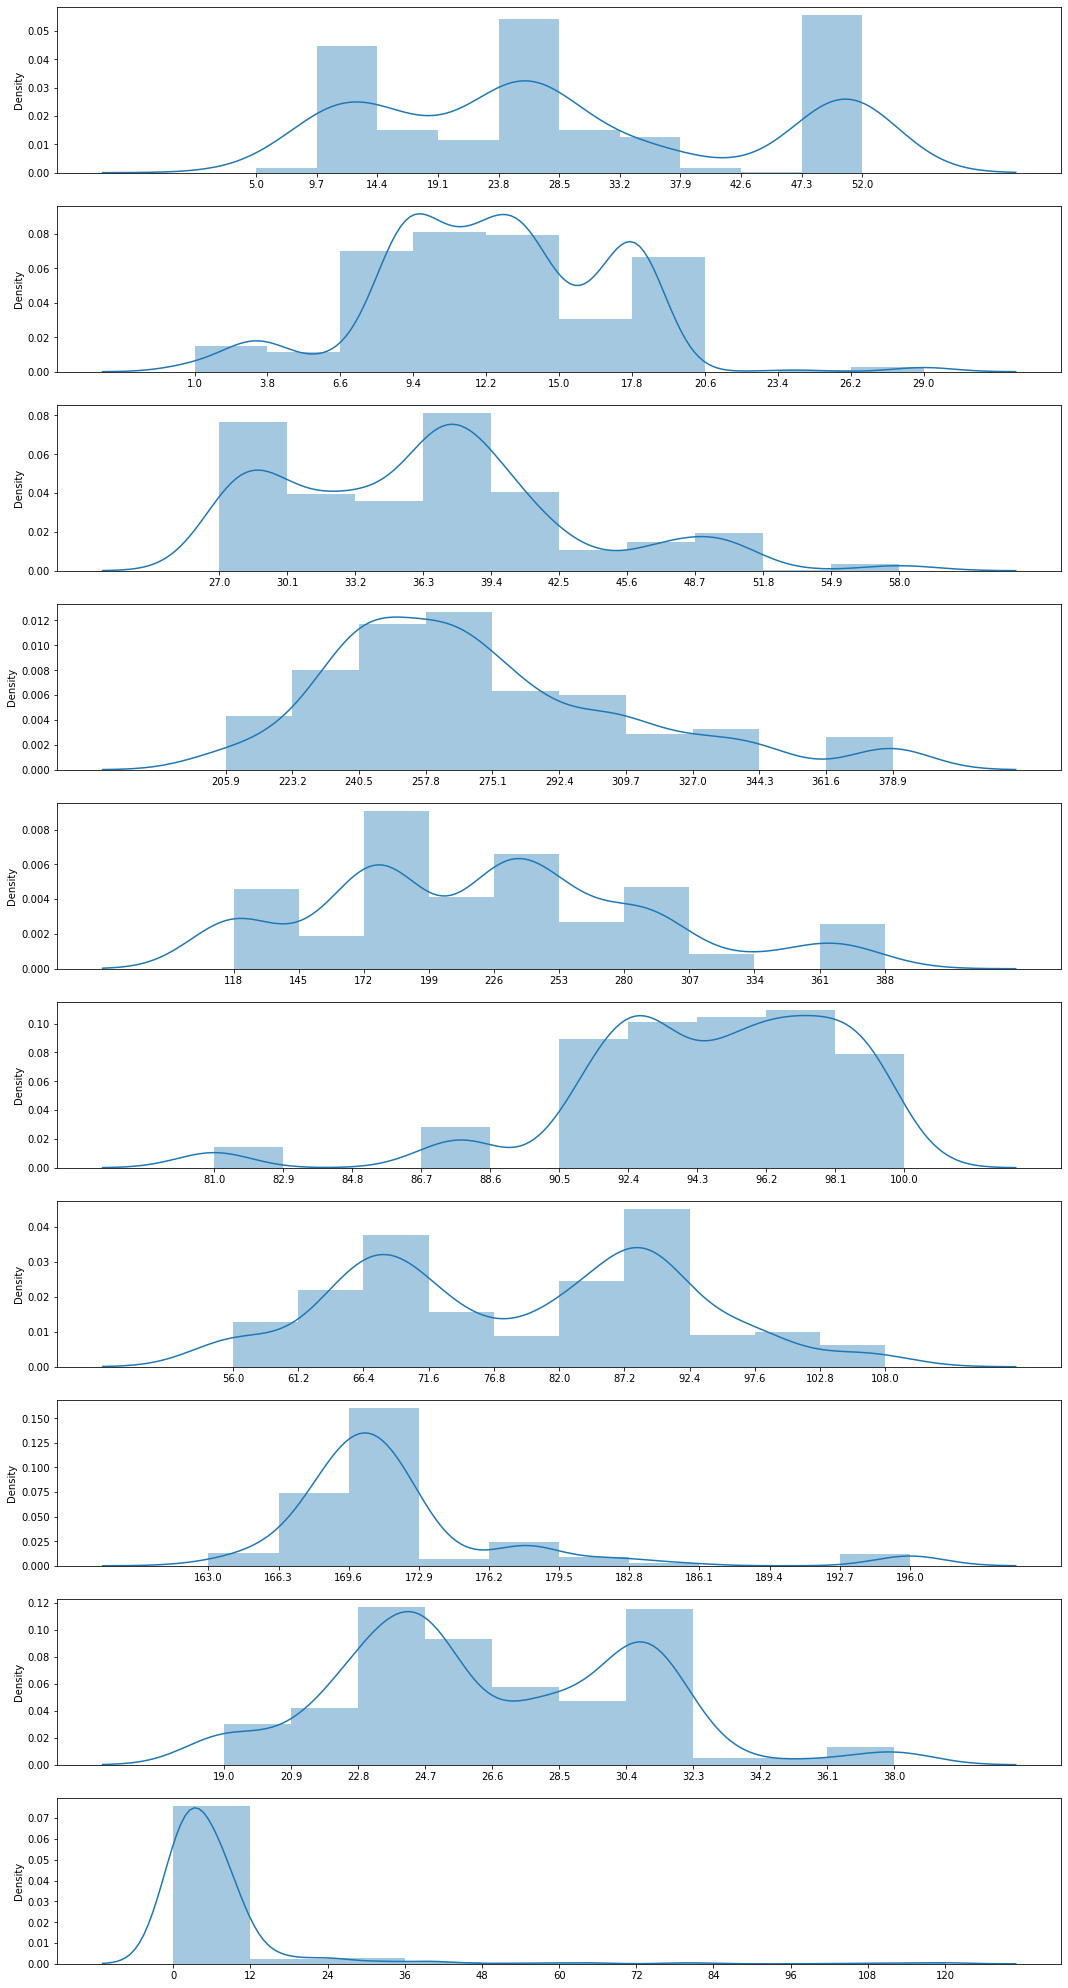

In [19]:
b=list(enumerate(continuous))
plt.figure(figsize=(18,36))
for x in b:
    plt.subplot(10,1,x[0]+1)
    sns.distplot(x=df[x[1]],bins=10)
    plt.xticks(np.linspace(min(df[x[1]]),max(df[x[1]]),11)) 
plt.show()

## Categorical Data

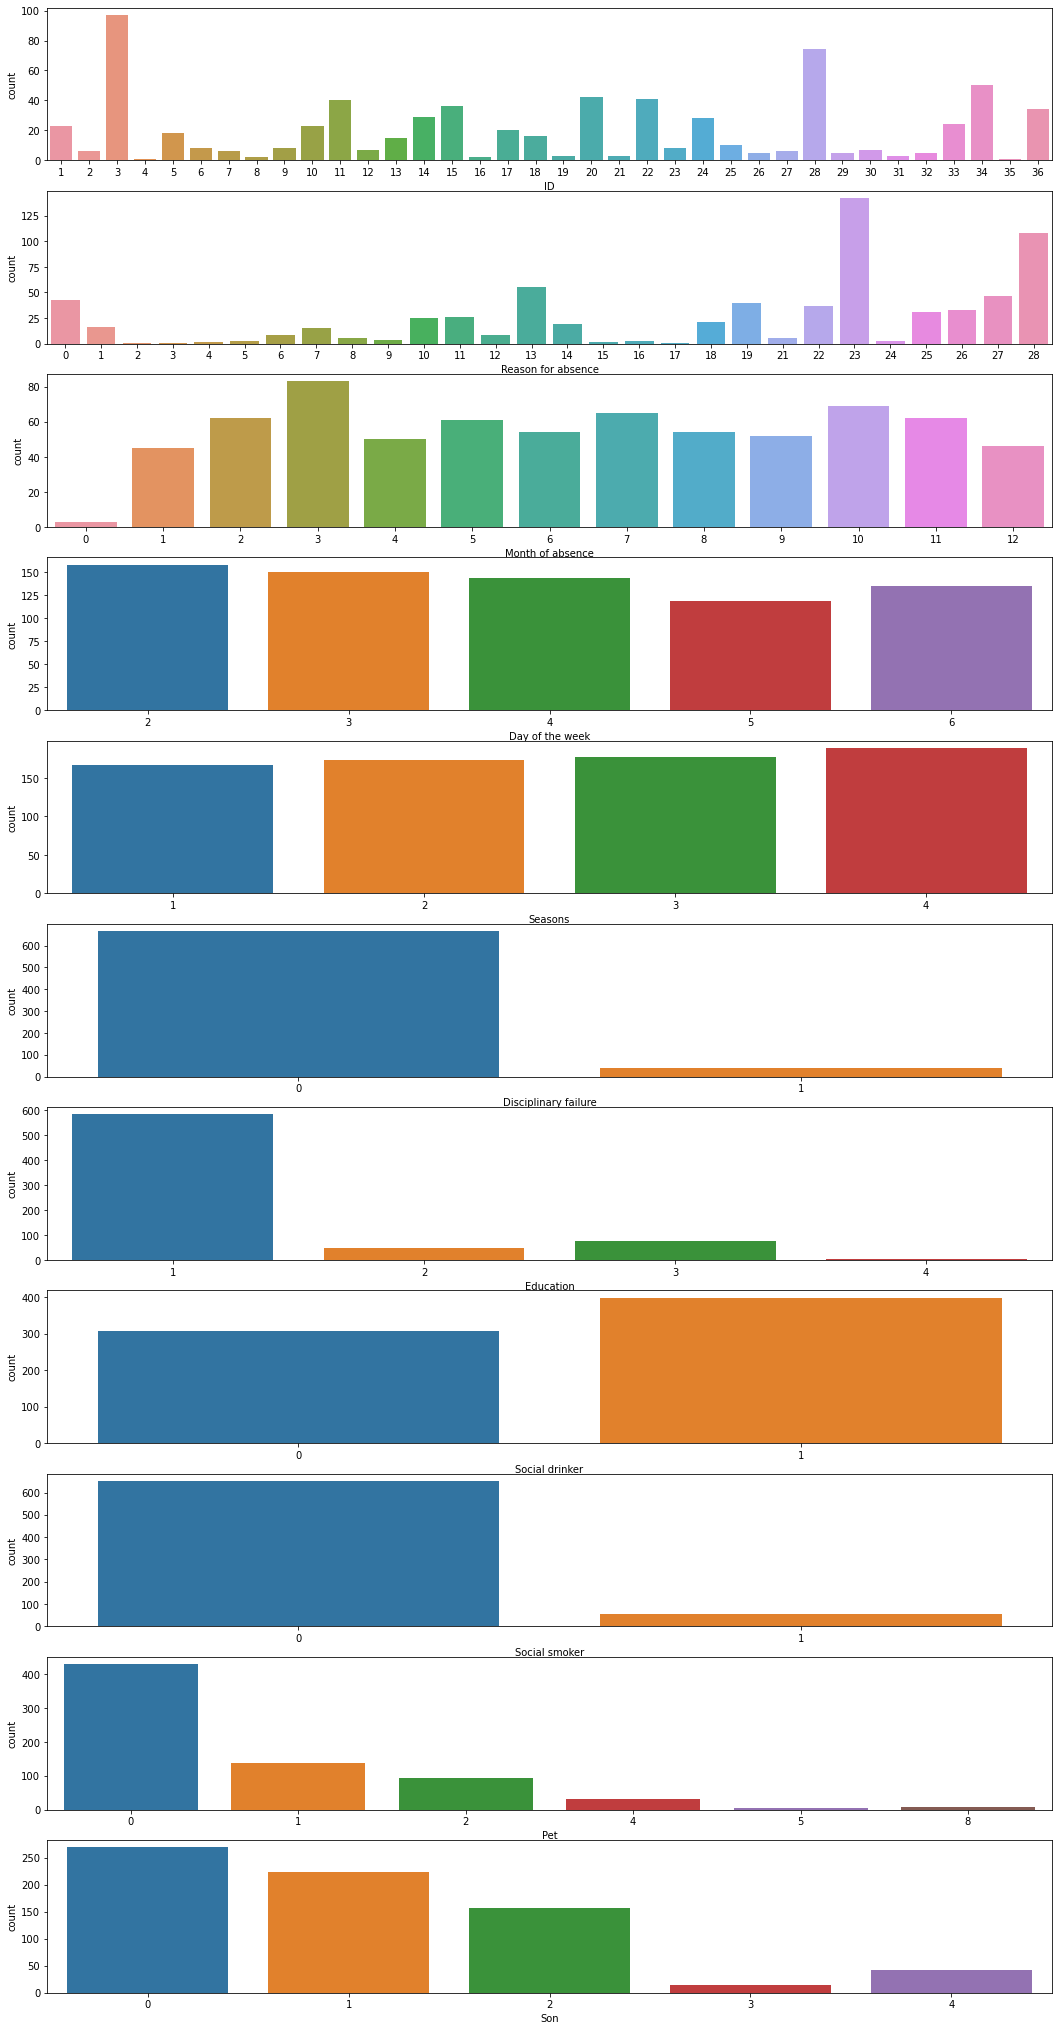

In [20]:
b=list(enumerate(categorical))
plt.figure(figsize=(18,50))
for x in b:
    plt.subplot(15,1,x[0]+1)
    sns.countplot(x=df[x[1]]) 
plt.show()

## Bivariate Analysis

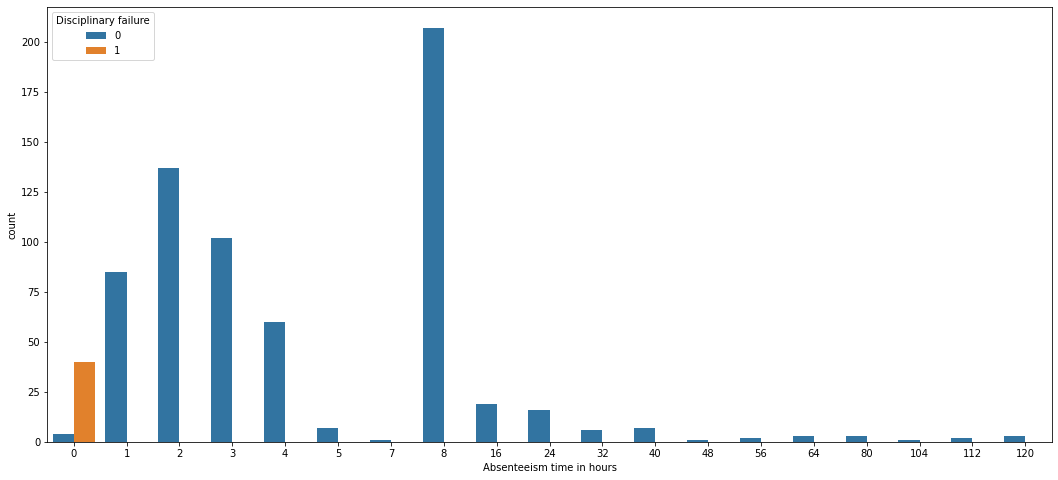

In [69]:
fig=plt.subplots(figsize=(18,8))
sns.countplot(x=data['Absenteeism time in hours'],hue=data['Disciplinary failure'])
plt.show()

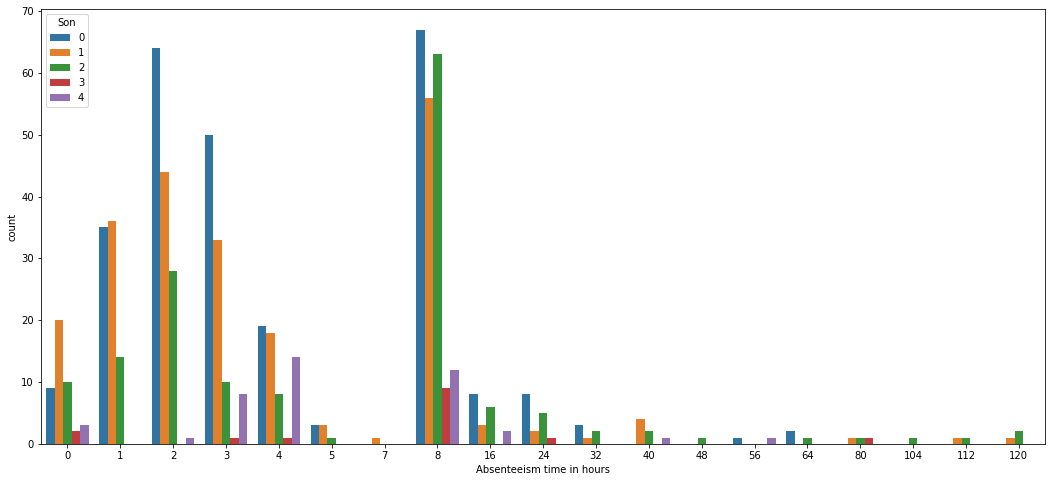

In [64]:
fig=plt.subplots(figsize=(18,8))
sns.countplot(x=data['Absenteeism time in hours'],hue=data['Son'])
plt.show()

## Multivariate Analysis

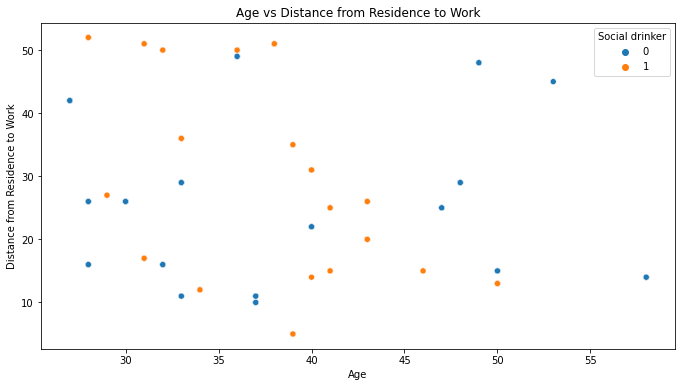

In [65]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Distance from Residence to Work', data=df, hue='Social drinker')
plt.title('Age vs Distance from Residence to Work')
plt.xlabel('Age')
plt.ylabel('Distance from Residence to Work')
plt.show()

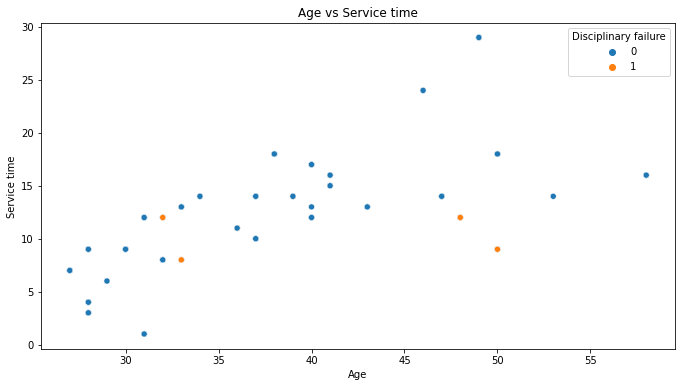

In [66]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Service time', data=df, hue='Disciplinary failure')
plt.title('Age vs Service time')
plt.xlabel('Age')
plt.ylabel('Service time')
plt.show()

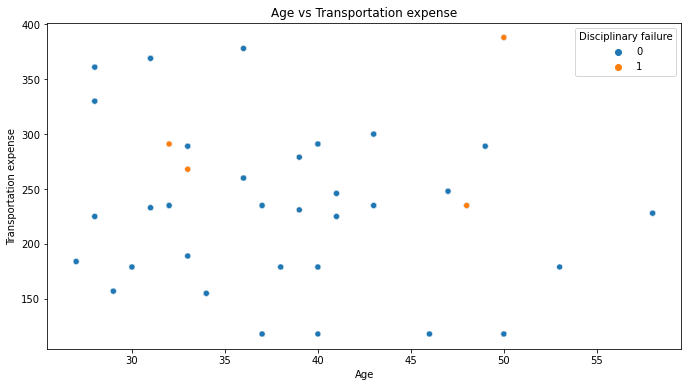

In [67]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Transportation expense', data=df, hue='Disciplinary failure')
plt.title('Age vs Transportation expense')
plt.xlabel('Age')
plt.ylabel('Transportation expense')
plt.show()

## Correlation

<AxesSubplot:>

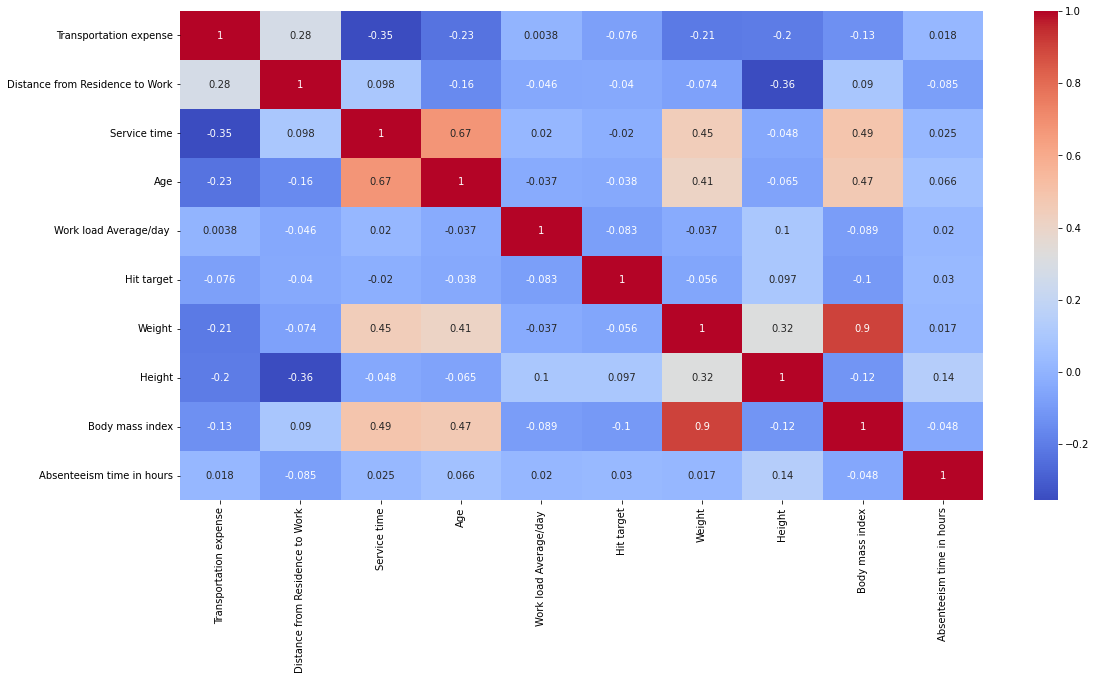

In [21]:
plt.figure(figsize=(18, 9))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')

## Data Preprocessing

In [23]:
data=df.drop('ID',axis=1)

In [24]:
X=data[data['Absenteeism time in hours']!=0][['Absenteeism time in hours','Transportation expense','Distance from Residence to Work','Month of absence','Age','Service time','Reason for absence']]

no. of cluster: 2 ,distortion: 1318802.179347574 ,silhouette avg: 0.5214200716663482
no. of cluster: 3 ,distortion: 769357.0987134717 ,silhouette avg: 0.4879387684509312
no. of cluster: 4 ,distortion: 537891.796015814 ,silhouette avg: 0.5073039651600044
no. of cluster: 5 ,distortion: 362466.722431524 ,silhouette avg: 0.5304657902351607
no. of cluster: 6 ,distortion: 306631.26084204565 ,silhouette avg: 0.5425269016856938
no. of cluster: 7 ,distortion: 262556.3101839117 ,silhouette avg: 0.527592958721186
no. of cluster: 8 ,distortion: 228987.1836534033 ,silhouette avg: 0.5092403188565635
no. of cluster: 9 ,distortion: 203359.21640410155 ,silhouette avg: 0.5156374587152032


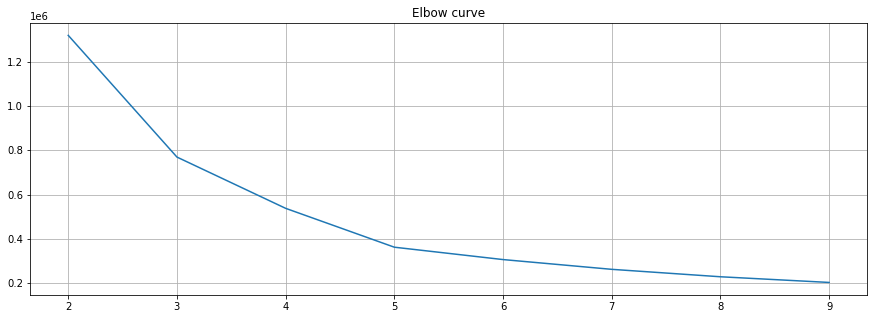

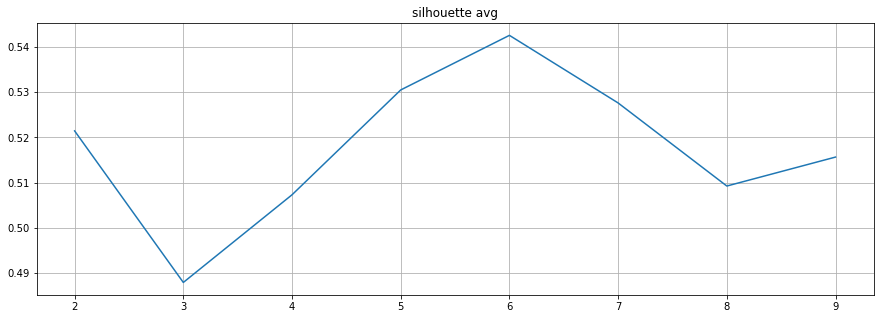

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette=[]
dist=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k,random_state=2)
    cluster=kmeans.fit(X)
    distorion=kmeans.inertia_
    cluster_label=cluster.predict(X)
    silhouette_avg = silhouette_score(X, cluster_label)
    dist.append(distorion)
    silhouette.append(silhouette_avg)
    print('no. of cluster:',k,',distortion:',distorion,',silhouette avg:',silhouette_avg)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), dist)
plt.grid(True)
plt.title('Elbow curve')
plt.show()
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), silhouette)
plt.grid(True)
plt.title('silhouette avg')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.36968259520261615
For n_clusters = 3 The average silhouette_score is : 0.2918779577630762
For n_clusters = 4 The average silhouette_score is : 0.3108711607130532
For n_clusters = 5 The average silhouette_score is : 0.3308835076329511
For n_clusters = 6 The average silhouette_score is : 0.34539072327845743


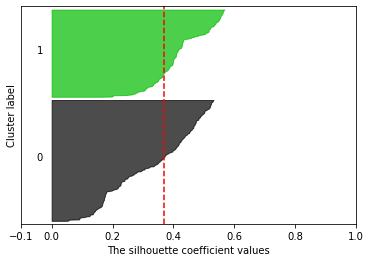

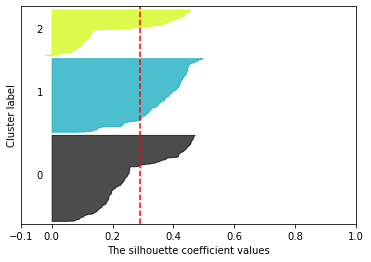

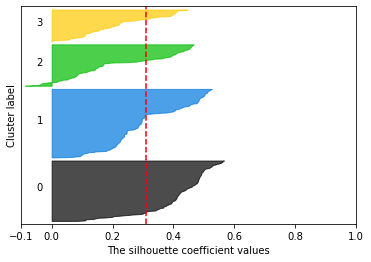

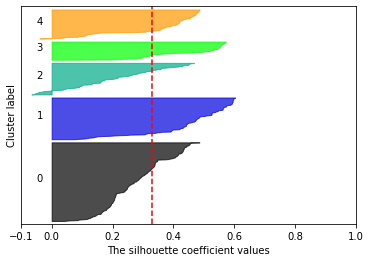

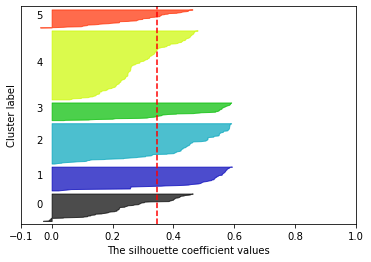

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)

    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

## KMeans Clustering

[[ 7.70873786 29.04854369]
 [14.03357314 37.52997602]
 [16.65060241 49.63855422]]


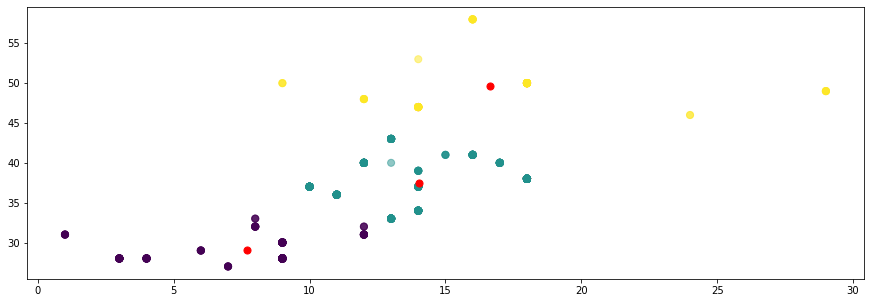

In [41]:
ins = df[['Service time', 'Age']]
kmeans = KMeans(n_clusters=3,n_init=3).fit(ins)
centroids = kmeans.cluster_centers_
print(centroids)
f, ax = plt.subplots(figsize = (15,5))
plt.scatter(ins['Service time'], ins['Age'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

[[ 12.05217391 252.69275362]
 [ 14.31081081 158.57094595]
 [  6.58461538 358.55384615]]


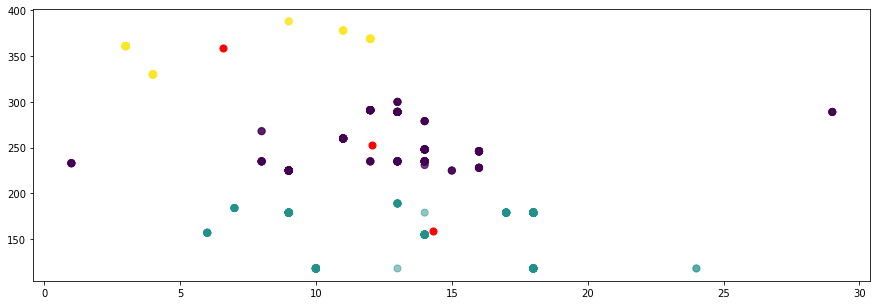

In [42]:
ins = df[['Service time', 'Transportation expense']]
kmeans = KMeans(n_clusters=3,n_init=3).fit(ins)
centroids = kmeans.cluster_centers_
print(centroids)
f, ax = plt.subplots(figsize = (15,5))
plt.scatter(ins['Service time'], ins['Transportation expense'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

[[24.29284165  4.1626898 ]
 [13.4        85.33333333]
 [ 8.39565217  8.0173913 ]]


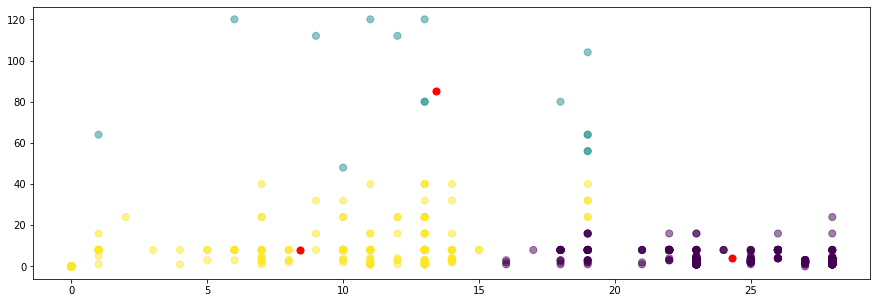

In [43]:
ins = df[['Reason for absence', 'Absenteeism time in hours']]
kmeans = KMeans(n_clusters=3,n_init=3).fit(ins)
centroids = kmeans.cluster_centers_
print(centroids)
f, ax = plt.subplots(figsize = (15,5))
plt.scatter(ins['Reason for absence'], ins['Absenteeism time in hours'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

[[ 36.79130435 252.69275362]
 [ 37.38513514 158.57094595]
 [ 30.69230769 358.55384615]]


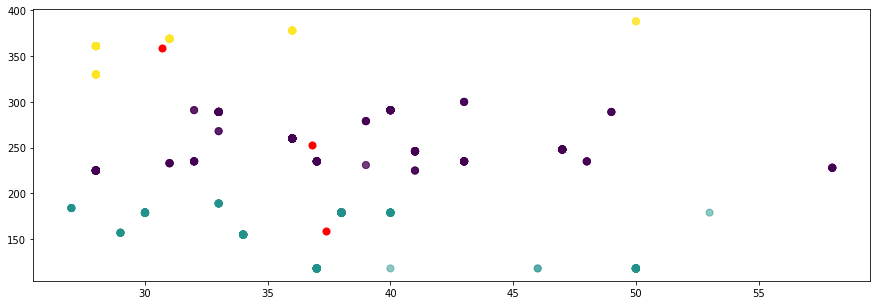

In [44]:
ins = df[['Age', 'Transportation expense']]
kmeans = KMeans(n_clusters=3,n_init=3).fit(ins)
centroids = kmeans.cluster_centers_
print(centroids)
f, ax = plt.subplots(figsize = (15,5))
plt.scatter(ins['Age'], ins['Transportation expense'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

## HDBSCAN

k = 2 outlier = 330 ['Service time', 'Age']


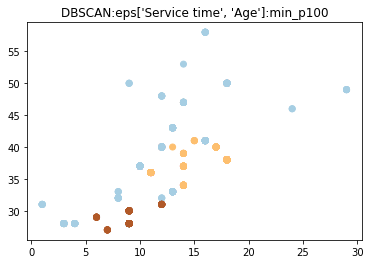

k = 2 outlier = 400 ['Service time', 'Age']


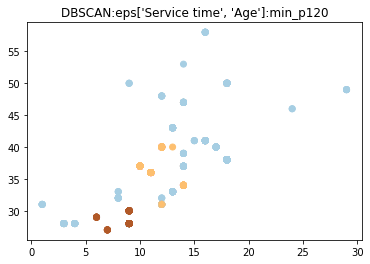

k = 2 outlier = 369 ['Service time', 'Age']


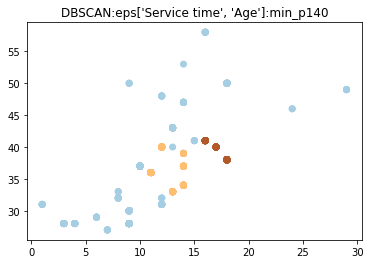

k = 0 outlier = 706 ['Service time', 'Age']


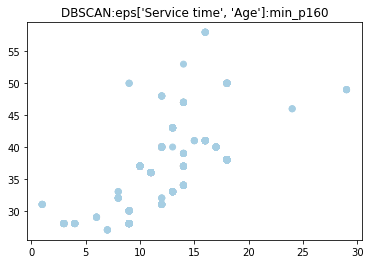

k = 0 outlier = 706 ['Service time', 'Age']


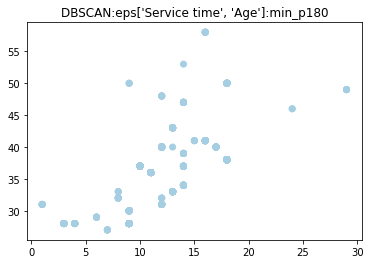

k = 2 outlier = 152 ['Service time', 'Transportation expense']


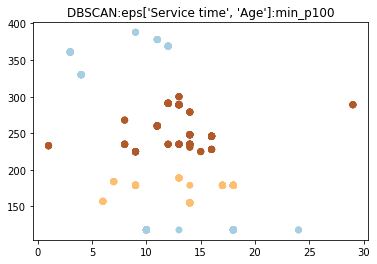

k = 2 outlier = 157 ['Service time', 'Transportation expense']


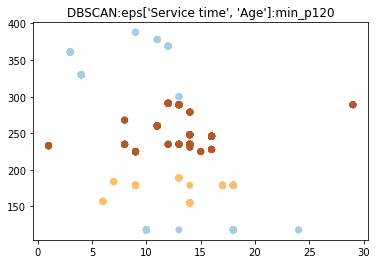

k = 2 outlier = 241 ['Service time', 'Transportation expense']


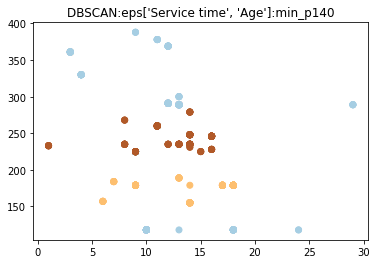

k = 2 outlier = 241 ['Service time', 'Transportation expense']


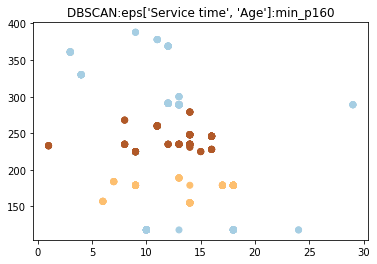

k = 2 outlier = 241 ['Service time', 'Transportation expense']


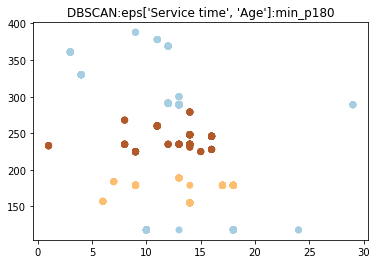

k = 2 outlier = 223 ['Distance from Residence to Work', 'Transportation expense']


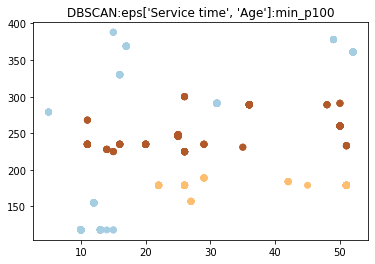

k = 2 outlier = 228 ['Distance from Residence to Work', 'Transportation expense']


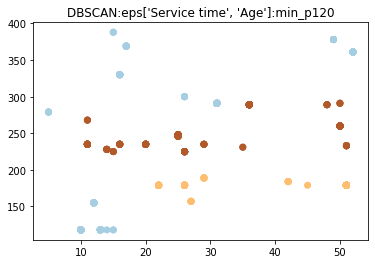

k = 2 outlier = 276 ['Distance from Residence to Work', 'Transportation expense']


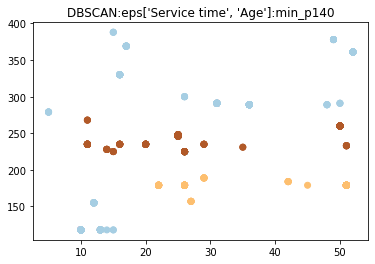

k = 2 outlier = 318 ['Distance from Residence to Work', 'Transportation expense']


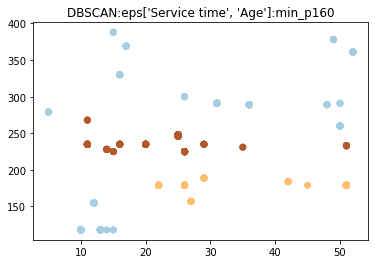

k = 0 outlier = 706 ['Distance from Residence to Work', 'Transportation expense']


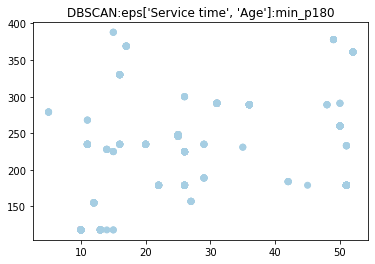

k = 2 outlier = 152 ['Age', 'Transportation expense']


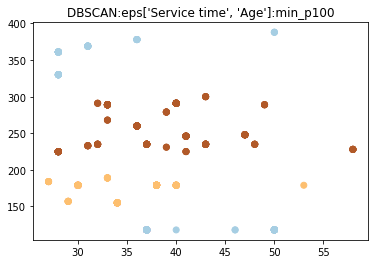

k = 2 outlier = 157 ['Age', 'Transportation expense']


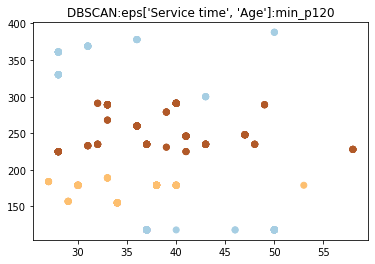

k = 2 outlier = 241 ['Age', 'Transportation expense']


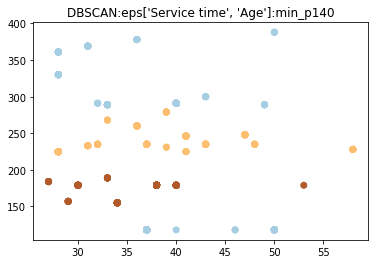

k = 2 outlier = 241 ['Age', 'Transportation expense']


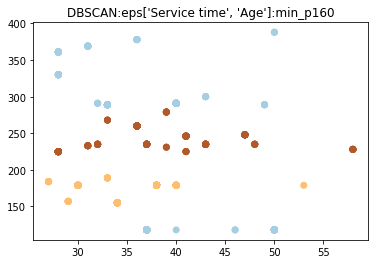

k = 2 outlier = 241 ['Age', 'Transportation expense']


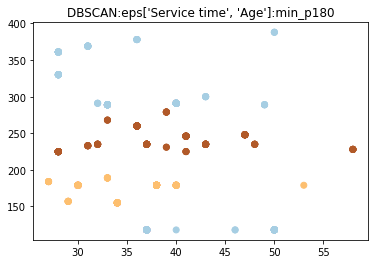

k = 3 outlier = 154 ['Age', 'Distance from Residence to Work']


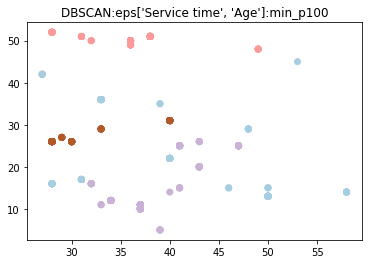

k = 3 outlier = 165 ['Age', 'Distance from Residence to Work']


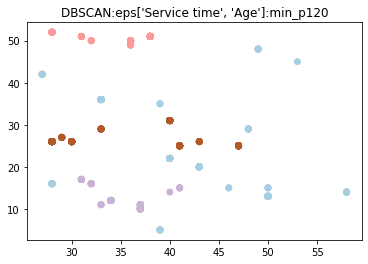

k = 2 outlier = 64 ['Age', 'Distance from Residence to Work']


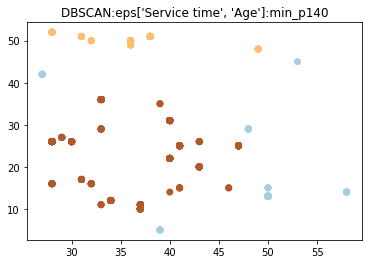

k = 2 outlier = 69 ['Age', 'Distance from Residence to Work']


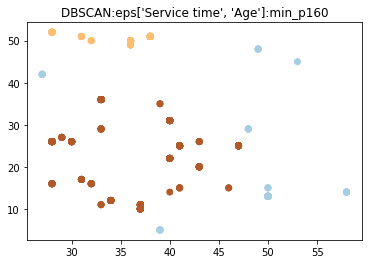

k = 2 outlier = 72 ['Age', 'Distance from Residence to Work']


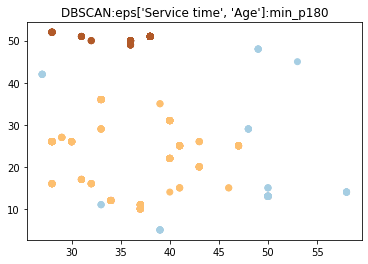

In [46]:
import hdbscan
for z in List:
    df4=data[z]
    for y in range(100,200,20):
      values = PCA().fit_transform(df4)
      hdb = hdbscan.HDBSCAN(min_cluster_size=y, gen_min_span_tree=True)
      df4[f'{z}{x}{y}'] = hdb.fit_predict(values)
      y_pred=df4[f'{z}{x}{y}']
      k=df4[f'{z}{x}{y}'].max()+1
      outlier=np.sum(df4[f'{z}{x}{y}']==-1)
      if k < 40:
        print('k =',k,'outlier =',outlier, z)
        plt.scatter(df4[z[0]], df4[z[1]],c = y_pred, cmap='Paired')
        plt.title(f"DBSCAN:eps{x}:min_p{y}")
        plt.show()

## DBSCAN

In [56]:
from sklearn.cluster import DBSCAN

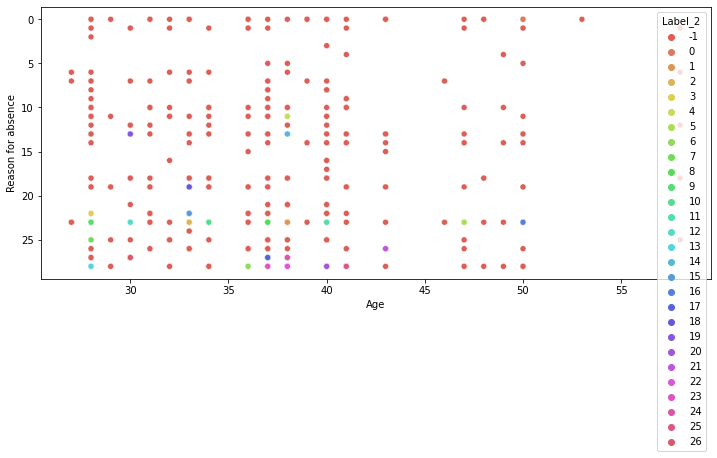

In [58]:
db= DBSCAN(min_samples=7, eps=0.5).fit(data[['Age','Reason for absence']])
data['Label_2']=db.labels_

plt.figure(figsize=(12,5))
sns.scatterplot(data['Age'], data['Reason for absence'], hue= data['Label_2'],palette=sns.color_palette('hls',np.unique(db.labels_).shape[0]))
plt.show()

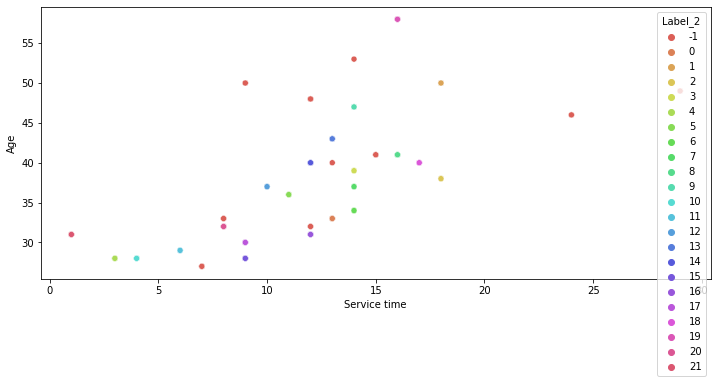

In [59]:
db= DBSCAN(min_samples=7, eps=0.5).fit(data[['Service time', 'Age']])
data['Label_2']=db.labels_

plt.figure(figsize=(12,5))
sns.scatterplot(data['Service time'], data['Age'], hue= data['Label_2'],palette=sns.color_palette('hls',np.unique(db.labels_).shape[0]))
plt.show()

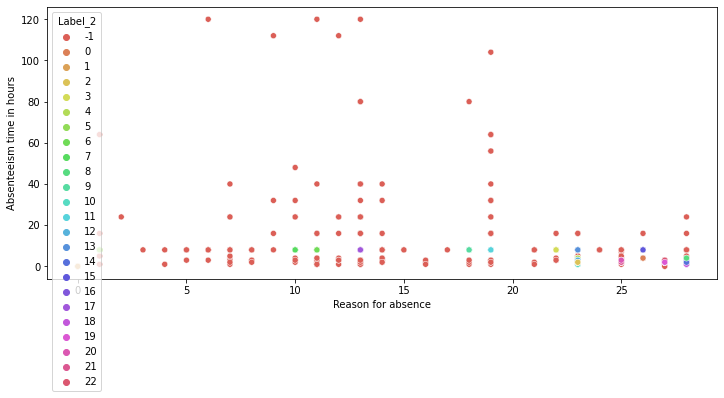

In [60]:
db= DBSCAN(min_samples=7, eps=0.5).fit(data[['Reason for absence', 'Absenteeism time in hours']])
data['Label_2']=db.labels_

plt.figure(figsize=(12,5))
sns.scatterplot(data['Reason for absence'], data['Absenteeism time in hours'], hue= data['Label_2'],palette=sns.color_palette('hls',np.unique(db.labels_).shape[0]))
plt.show()

## Conclusion

Employees with ID 3, 28 and 34 are some of the employees who are absent the most.

The reasons most used by employees to be absent are reason 13, 20, 23 and 28. 

People who tend to be social drinkers tend to be more absent than those who don’t drink.

Mostly Employees are absent on Mondays and Tuesdays.

Employees having a maximum of two children or no child at all are absent the most.